In [1]:
import pandas as pd
from collections import Counter

In [3]:
data = pd.read_csv("cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv")
print(data.head())
print(data.columns.tolist())
# Concatenate the symptom columns into a single column
# symptoms = pd.concat([data['SYMPTOM1'], data['SYMPTOM2'], data['SYMPTOM3'], data['SYMPTOM4']], ignore_index=True)
# data['symp'] = symptoms

# Get the top 15 most common symptoms
# top_10_symptoms = data['Symptom'].value_counts().head(10)

# data['OTHER_MEDS'] = data['OTHER_MEDS'].str.lower()

In [87]:
# Extract the 'OTHER_MED' column and split the values by comma
other_med_values = data['OTHER_MEDS'].dropna().str.split(',')

# Flatten the list of lists and convert it into a single list of all values
all_other_med_values = [val.strip().lower() for sublist in other_med_values for val in sublist]

# Exclude 'No medication' from the list
filtered_values = [val for val in all_other_med_values if val != 'no medication' and val != 'none' and val != '' and val != 'unknown' and val != 'no']

unique_values = set(filtered_values)

# print("Unique values in 'OTHER_MED' column:")
# for value in unique_values:
#     print(value)


In [88]:
value_counts = Counter(filtered_values)

# Get top 10 occurrences
top_10_occurrences = value_counts.most_common(10)

# top_10_occurrences = top_10_occurrences != 'No medications'
print("Top 10 occurrences of values in 'OTHER_MED' column:")
for value, count in top_10_occurrences:
    print(f"{value}: {count} occurrences")

Top 10 occurrences of values in 'OTHER_MED' column:
vitamin d: 16995 occurrences
multivitamin: 12978 occurrences
levothyroxine: 10833 occurrences
atorvastatin: 9376 occurrences
vitamin c: 9279 occurrences
lisinopril: 9192 occurrences
metformin: 8237 occurrences
calcium: 7992 occurrences
vitamin d3: 7716 occurrences
fish oil: 7586 occurrences


In [89]:
top_10_medications = [value for value, _ in top_10_occurrences]
top_10_medications


['vitamin d',
 'multivitamin',
 'levothyroxine',
 'atorvastatin',
 'vitamin c',
 'lisinopril',
 'metformin',
 'calcium',
 'vitamin d3',
 'fish oil']

In [90]:
# print(data['OTHER_MEDS'].head())

# Function to check if any top 10 medication is present in a cell
def check_top_10_presence(cell,med_name):
    meds = [med.strip() for med in cell.split(',')]
    # print(meds)
    for med in meds:
        for top_med in med_name:
            if top_med.lower() in med.lower():
                return 'Y'
    return 'N'

for med in top_10_medications:
    data[f'POP_MED_{med}'] = data['OTHER_MEDS'].fillna('').apply(lambda x: check_top_10_presence(x, [med]))

data.columns.tolist()



['VAERS_ID',
 'RECVDATE',
 'STATE',
 'AGE_YRS',
 'CAGE_YR',
 'SEX',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'HOSPDAYS',
 'X_STAY',
 'DISABLE',
 'RECOVD',
 'VAX_DATE',
 'ONSET_DATE',
 'NUMDAYS',
 'V_ADMINBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'FORM_VERS',
 'TODAYS_DATE',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_LOT',
 'VAX_DOSE_SERIES',
 'VAX_ROUTE',
 'VAX_SITE',
 'VAX_NAME',
 'SYMPTOM1',
 'SYMPTOMVERSION1',
 'SYMPTOM2',
 'SYMPTOMVERSION2',
 'SYMPTOM3',
 'SYMPTOMVERSION3',
 'SYMPTOM4',
 'SYMPTOMVERSION4',
 'symp',
 'POP_MED_vitamin d',
 'POP_MED_multivitamin',
 'POP_MED_levothyroxine',
 'POP_MED_atorvastatin',
 'POP_MED_vitamin c',
 'POP_MED_lisinopril',
 'POP_MED_metformin',
 'POP_MED_calcium',
 'POP_MED_vitamin d3',
 'POP_MED_fish oil']

In [91]:
for med in top_10_medications:
    pop_med_counts = data[f'POP_MED_{med}'].value_counts()

    # Get the count of 'Y' and 'N'
    count_y = pop_med_counts.get('Y', 0)
    count_n = pop_med_counts.get('N', 0)

    # Calculate the ratio
    if count_n + count_y != 0:
        ratio_y = count_y / (count_n + count_y)
        ratio_n = count_n / (count_n + count_y)
    else:
        ratio_y = 0
        ratio_n = 0

    print(f"Ratio of 'Y' in 'POP_MED': {ratio_y:.2f}")
    print(f"Ratio of 'N' in 'POP_MED': {ratio_n:.2f}")

Ratio of 'Y' in 'POP_MED': 0.11
Ratio of 'N' in 'POP_MED': 0.89
Ratio of 'Y' in 'POP_MED': 0.06
Ratio of 'N' in 'POP_MED': 0.94
Ratio of 'Y' in 'POP_MED': 0.04
Ratio of 'N' in 'POP_MED': 0.96
Ratio of 'Y' in 'POP_MED': 0.05
Ratio of 'N' in 'POP_MED': 0.95
Ratio of 'Y' in 'POP_MED': 0.04
Ratio of 'N' in 'POP_MED': 0.96
Ratio of 'Y' in 'POP_MED': 0.04
Ratio of 'N' in 'POP_MED': 0.96
Ratio of 'Y' in 'POP_MED': 0.03
Ratio of 'N' in 'POP_MED': 0.97
Ratio of 'Y' in 'POP_MED': 0.05
Ratio of 'N' in 'POP_MED': 0.95
Ratio of 'Y' in 'POP_MED': 0.04
Ratio of 'N' in 'POP_MED': 0.96
Ratio of 'Y' in 'POP_MED': 0.03
Ratio of 'N' in 'POP_MED': 0.97


In [92]:
# convert top_10_symptoms to a list
top_10_symptoms_list = top_10_symptoms.index.to_list()
filtered_df = data[data['symp'].isin(top_10_symptoms_list)]
filtered_df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,POP_MED_vitamin d,POP_MED_multivitamin,POP_MED_levothyroxine,POP_MED_atorvastatin,POP_MED_vitamin c,POP_MED_lisinopril,POP_MED_metformin,POP_MED_calcium,POP_MED_vitamin d3,POP_MED_fish oil
1,902440,12/15/2020,AZ,35.0,35.0,F,C/O Headache,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
3,902464,12/15/2020,LA,42.0,42.0,M,within 15 minutes progressive light-headedness...,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
6,902490,12/15/2020,NM,37.0,37.0,F,"Headache, body ache",N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
8,902493,12/15/2020,SD,24.0,24.0,M,At 12:55 pm 10 minutes following vaccine being...,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
16,902572,12/16/2020,TX,24.0,24.0,F,Pfizer-BioNTech COVID-19 Vaccine EUA Develope...,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569006,2547664,12/30/2022,OH,46.0,46.0,F,At first I got the normal COVID vaccine sympto...,N,Not applicable,N,...,Y,N,N,N,N,N,N,N,N,N
569007,2547666,12/30/2022,SD,63.0,63.0,M,My wife and I were vaccinated on the same day/...,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
569012,2547672,12/31/2022,MA,31.0,31.0,F,"Systemic: Fainting / Unresponsive-Medium, Addi...",N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N
569019,2547690,12/31/2022,MI,88.0,88.0,M,Patient legs started going out around 3 pm. So...,N,Not applicable,N,...,N,N,N,N,N,N,N,N,N,N


In [93]:
data.columns.tolist()

['VAERS_ID',
 'RECVDATE',
 'STATE',
 'AGE_YRS',
 'CAGE_YR',
 'SEX',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'HOSPDAYS',
 'X_STAY',
 'DISABLE',
 'RECOVD',
 'VAX_DATE',
 'ONSET_DATE',
 'NUMDAYS',
 'V_ADMINBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'FORM_VERS',
 'TODAYS_DATE',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_LOT',
 'VAX_DOSE_SERIES',
 'VAX_ROUTE',
 'VAX_SITE',
 'VAX_NAME',
 'SYMPTOM1',
 'SYMPTOMVERSION1',
 'SYMPTOM2',
 'SYMPTOMVERSION2',
 'SYMPTOM3',
 'SYMPTOMVERSION3',
 'SYMPTOM4',
 'SYMPTOMVERSION4',
 'symp',
 'POP_MED_vitamin d',
 'POP_MED_multivitamin',
 'POP_MED_levothyroxine',
 'POP_MED_atorvastatin',
 'POP_MED_vitamin c',
 'POP_MED_lisinopril',
 'POP_MED_metformin',
 'POP_MED_calcium',
 'POP_MED_vitamin d3',
 'POP_MED_fish oil']

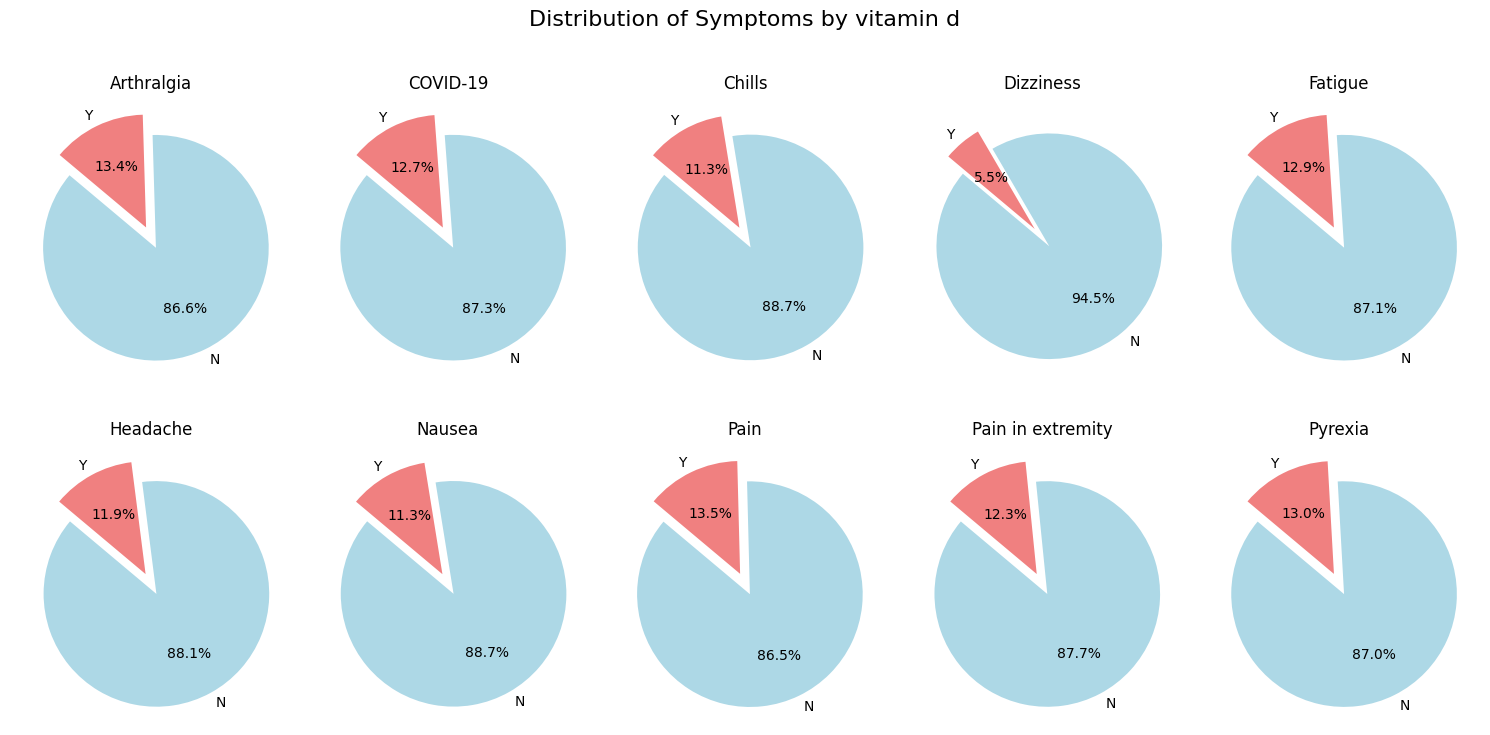

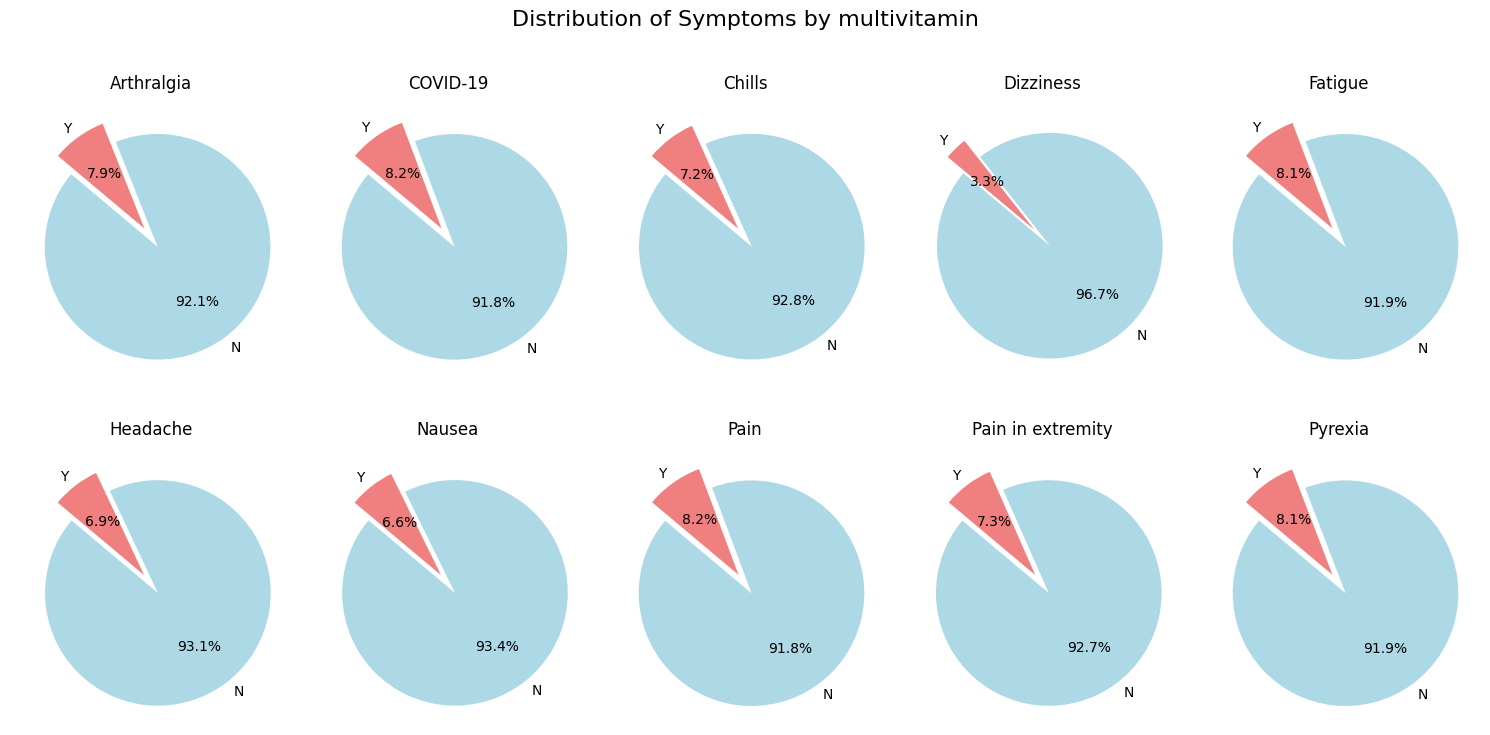

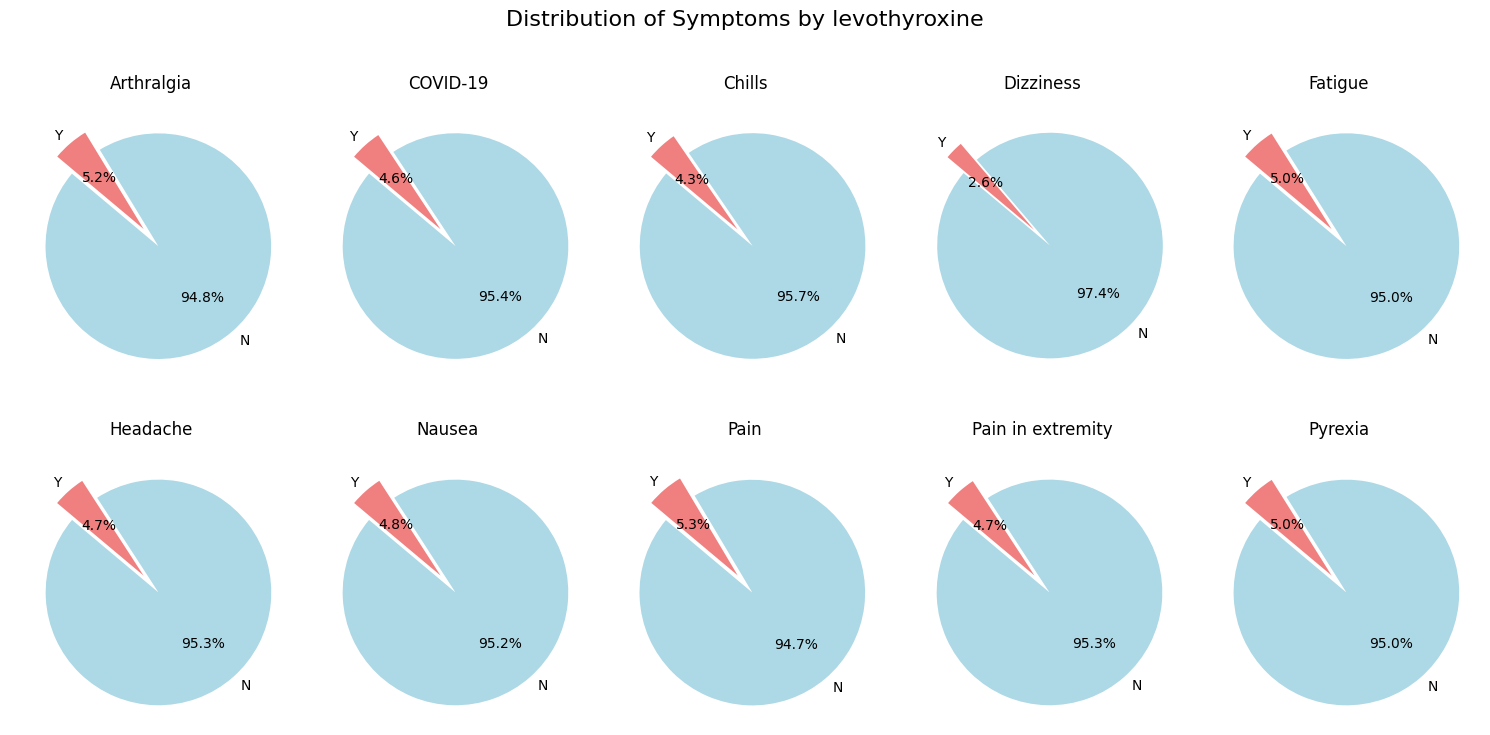

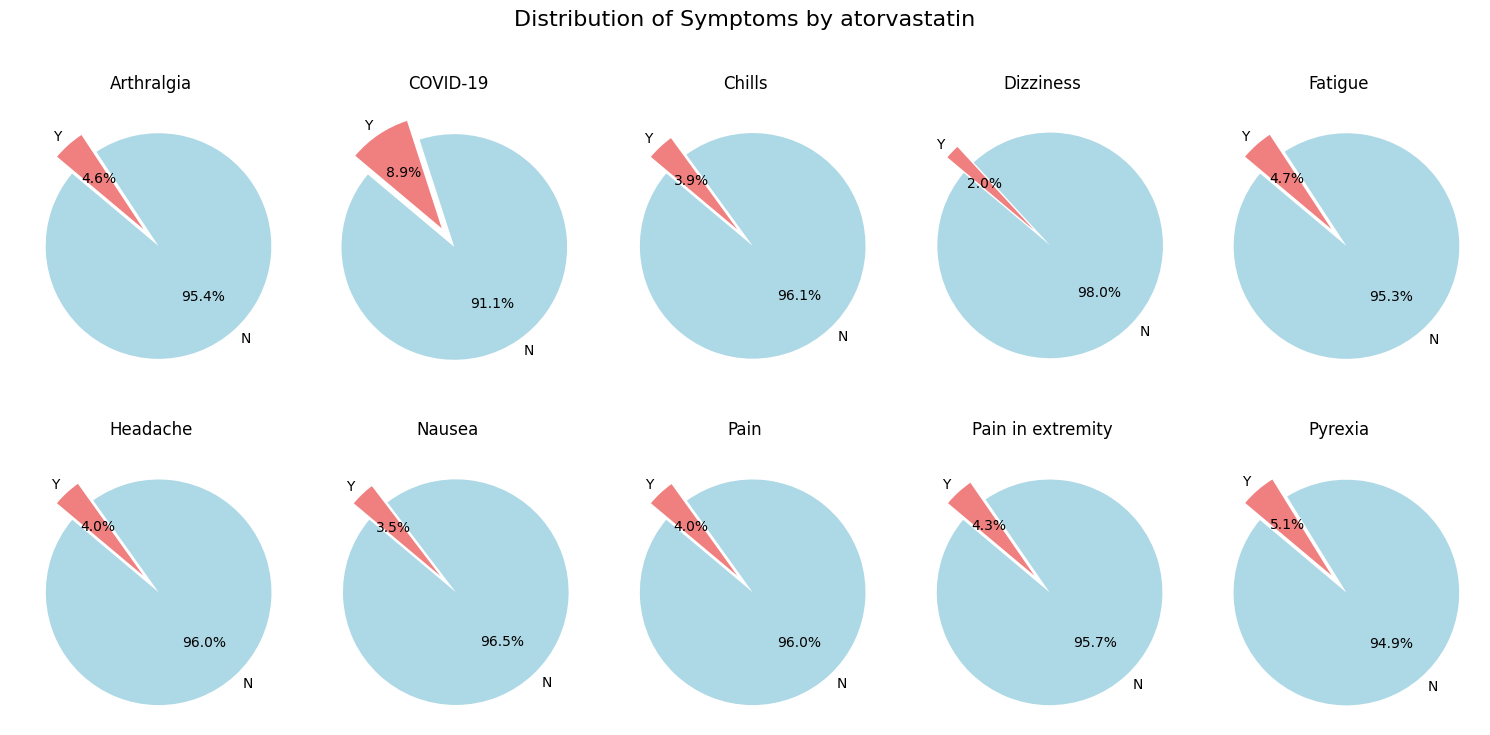

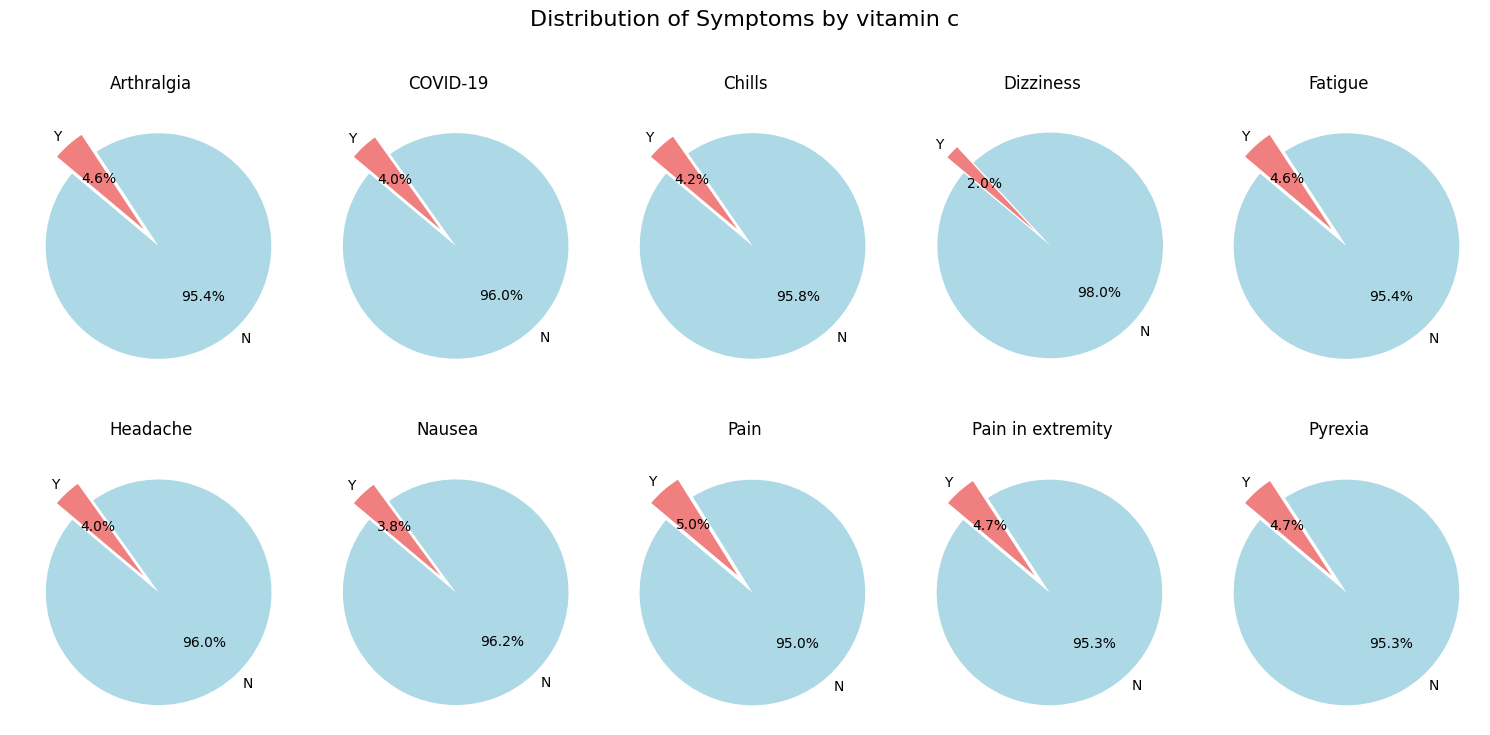

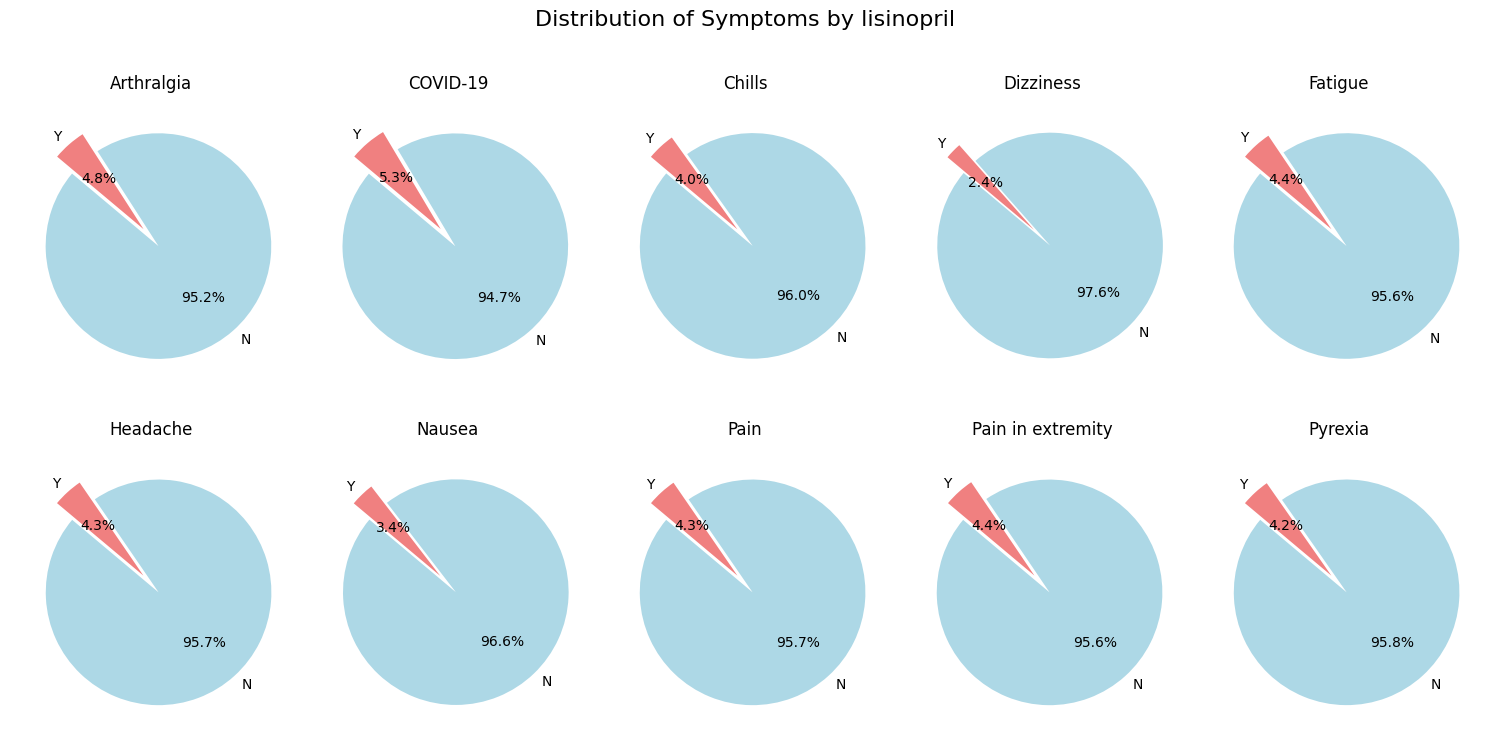

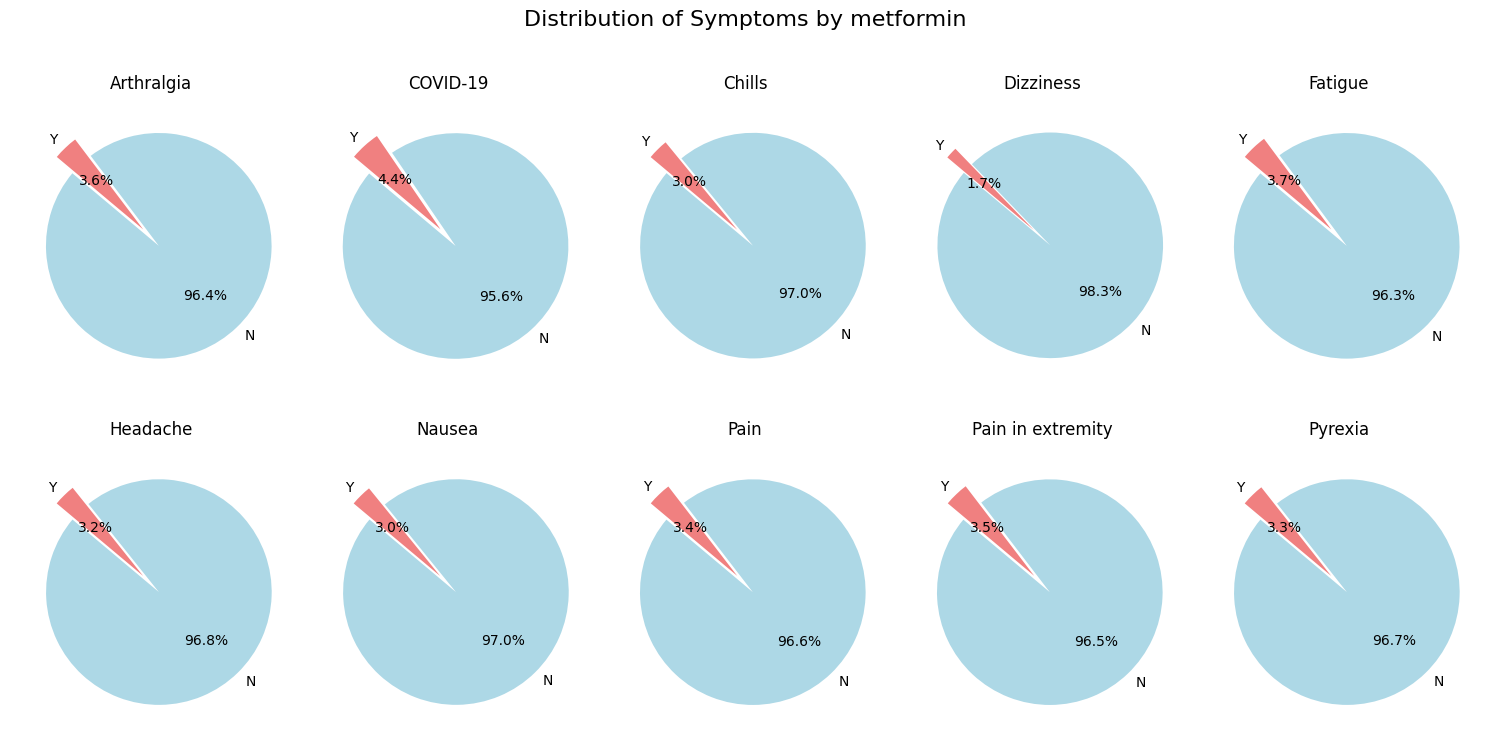

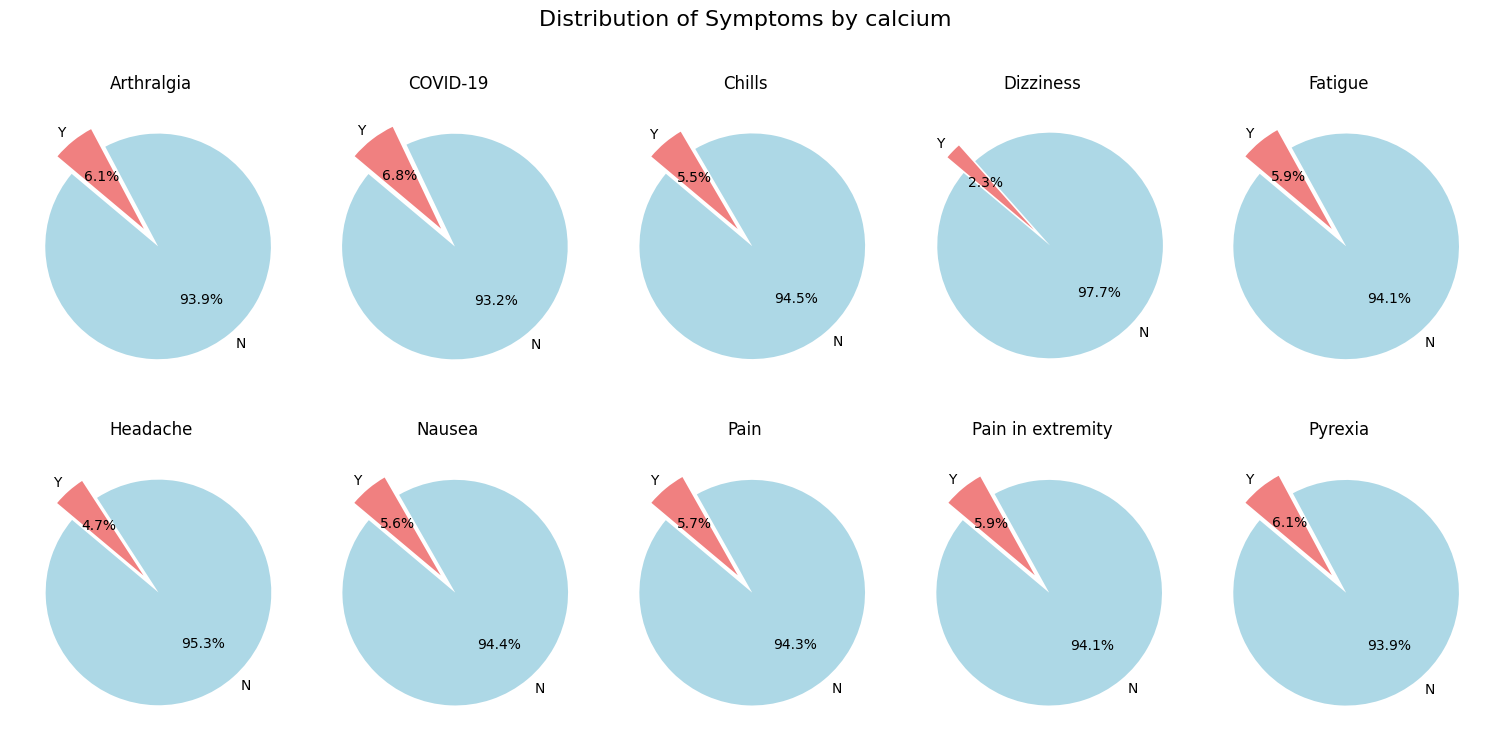

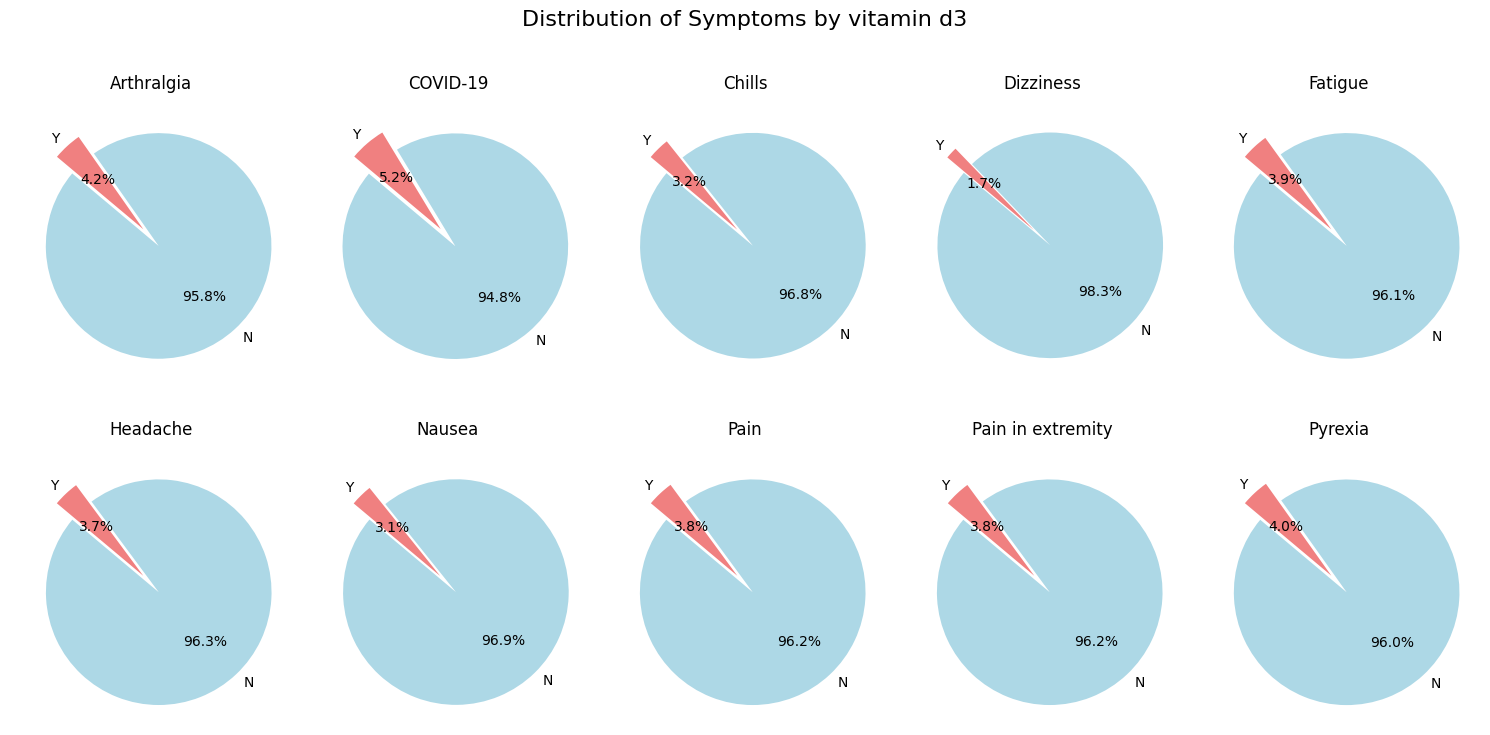

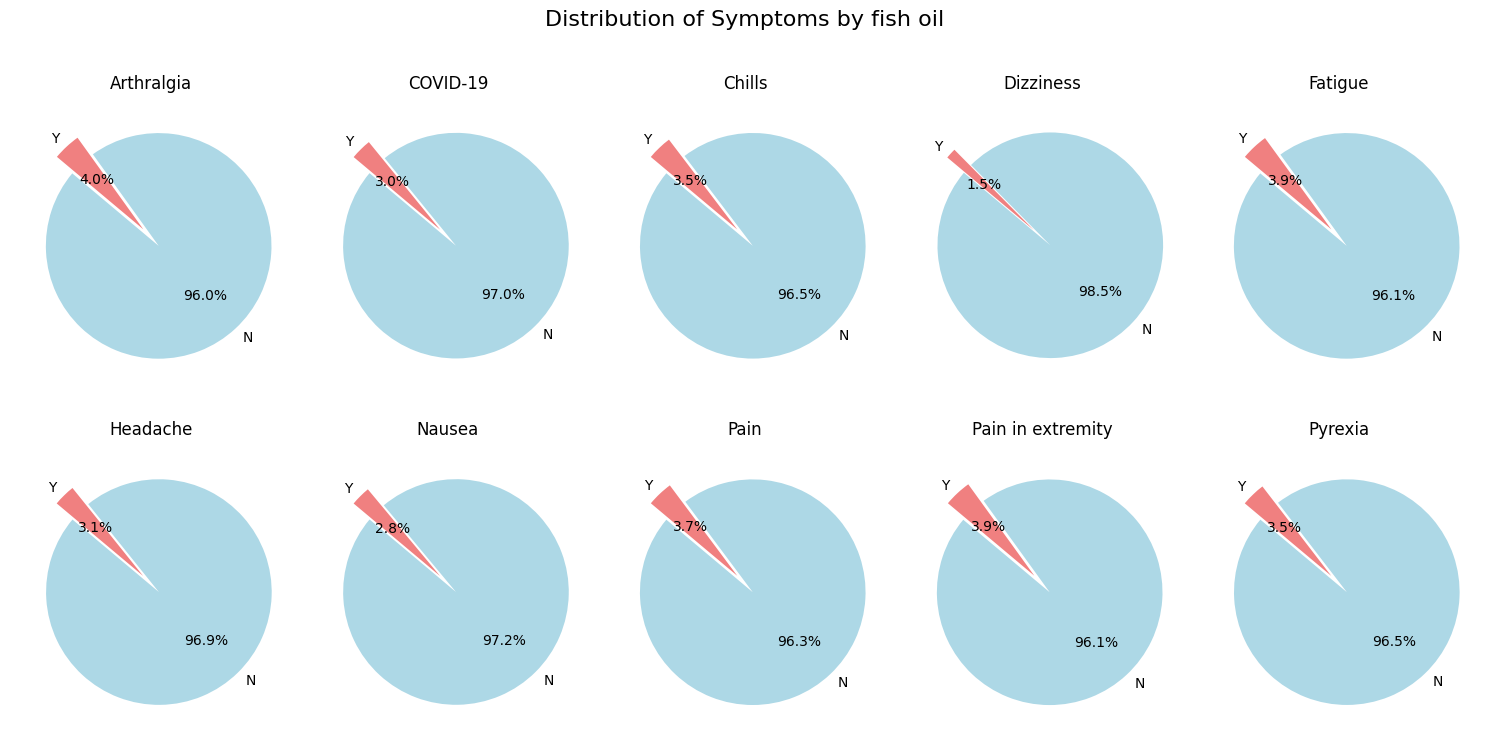

In [95]:
import matplotlib.pyplot as plt

for med in top_10_medications:
    # Create a new DataFrame with counts for each symptom and gender
    symptom_gender_counts = filtered_df.groupby(['symp', f'POP_MED_{med}']).size().unstack(fill_value=0)
    # symptom_gender_counts["Arthralgia"]
    # Set up subplots
    num_symptoms = len(symptom_gender_counts)
    num_cols = 5  # Adjust the number of columns based on your preference
    num_rows = (num_symptoms + num_cols - 1) // num_cols

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

    # Iterate over each symptom and plot a pie chart
    for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
        row_index = i // num_cols
        col_index = i % num_cols

        colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
        explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

        axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
        axes[row_index, col_index].set_title(f'{symptom}')

    # Add main title
    main_title = f"Distribution of Symptoms by {med}"
    plt.suptitle(main_title, fontsize=16)

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# newdf = data[(data['ALLERGIES'] != 'none') | (data['ALLERGIES'] != 'None') | (data['ALLERGIES'] != 'N')]
# print(newdf.shape)
# print(data.shape)
# print(newdf["ALLERGIES"])
# print(newdf["SYMPTOM1"])

# filtered_df = data[~data['ALLERGIES'].astype(str).str.lower().isin(['none', 'None', 'N', 'n', 'none.', 'None.', 'N/a', 'N/A', 'n/a', 'n/A'])]
# print(filtered_df.shape)
# print(filtered_df['ALLERGIES'])


In [ ]:
# print(data['ER_ED_VISIT'])

In [ ]:
# # Concatenate the symptom columns into a single column
# symptoms = pd.concat([data['SYMPTOM1'], data['SYMPTOM2'], data['SYMPTOM3'], data['SYMPTOM4']], ignore_index=True)
# data['symp'] = symptoms

# top_10_symptoms = symptoms[symptoms != 'No symptom'].value_counts().head(10)
# print(top_10_symptoms)

# top_10_symptoms_list = top_10_symptoms.index.to_list()
# filtered_df = data[data['symp'].isin(top_10_symptoms_list)]

# # Create a new DataFrame with counts for each symptom and gender
# symptom_gender_counts = filtered_df.groupby(['symp', 'ER_ED_VISIT']).size().unstack(fill_value=0)
# print(symptom_gender_counts)

# te=TransactionEncoder()
# te_ary = te.fit(data).transform(data)
# te_ary


In [ ]:
# data_f = pd.DataFrame(te_ary, columns=te.columns_)
# data_f

In [ ]:
# from mlxtend.frequent_patterns import apriori

# frequent_itemsets = apriori(data_f, min_support=0.1, use_colnames=True)
# frequent_itemsets